# volcano

In [3]:
from ggplot import *
import pandas  as pd
import  numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot
from rpy2.robjects import r
%load_ext rpy2.ipython

/apps/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/apps/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/apps/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
cd /home/xieyufeng/ex

/home/xieyufeng/ex


In [5]:
dataset='scirep'
sequencing_type = 'short'
if sequencing_type == 'short':
    exp_mx_name = 'domains_combined'
elif sequencing_type =='long':
    exp_mx_name = 'featurecounts'

In [6]:
if dataset =='scirep':
    compare_group_list = ['Normal-CRC','Normal-PAAD','Normal-PRAD']

In [7]:
for compare_group in compare_group_list:
    detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                       ,index_col=0)

In [8]:
detable

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p|hsa-let-7a-3p|0|21,491.088764,-0.042748,0.139017,-0.307505,7.584588e-01,9.969833e-01
hsa-let-7a-5p|miRNA|hsa-let-7a-5p|hsa-let-7a-5p|hsa-let-7a-5p|0|22,4678.910267,-0.283175,0.123065,-2.301026,2.139013e-02,1.674525e-01
hsa-let-7b-3p|miRNA|hsa-let-7b-3p|hsa-let-7b-3p|hsa-let-7b-3p|0|22,293.057797,0.139543,0.084493,1.651537,9.862900e-02,4.398898e-01
hsa-let-7b-5p|miRNA|hsa-let-7b-5p|hsa-let-7b-5p|hsa-let-7b-5p|0|22,54447.332390,0.066109,0.085206,0.775872,4.378248e-01,9.065117e-01
hsa-let-7c-5p|miRNA|hsa-let-7c-5p|hsa-let-7c-5p|hsa-let-7c-5p|0|22,4786.168037,-0.147378,0.109312,-1.348232,1.775836e-01,6.130526e-01
hsa-let-7d-3p|miRNA|hsa-let-7d-3p|hsa-let-7d-3p|hsa-let-7d-3p|0|22,2759.458240,-0.032526,0.094647,-0.343659,7.311025e-01,9.969833e-01
hsa-let-7d-5p|miRNA|hsa-let-7d-5p|hsa-let-7d-5p|hsa-let-7d-5p|0|22,1410.683343,-0.238938,0.089112,-2.681308,7.333497e-03,8.302182e-02
hsa-let-7e-3p|miRNA|hsa-let-7e-3p|hsa-let-7e-3p|hsa-let-7e-3p|0|22,124.038411,-0.126083,0.095790,-1.316240,1.880936e-01,6.292784e-01
hsa-let-7e-5p|miRNA|hsa-let-7e-5p|hsa-let-7e-5p|hsa-let-7e-5p|0|22,895.523729,-0.256462,0.110053,-2.330339,1.978822e-02,1.617593e-01
hsa-let-7f-1-3p|miRNA|hsa-let-7f-1-3p|hsa-let-7f-1-3p|hsa-let-7f-1-3p|0|22,73.651386,-0.024576,0.123281,-0.199349,8.419895e-01,9.969833e-01


In [21]:
de_plot_mx = pd.DataFrame(data={'feature':[name.split('|')[0] for name in detable.index.values],
                   'log2FoldChange':detable['log2FoldChange'].tolist(),
                   'padj':detable['padj'].tolist()})
de_plot_mx.set_index('feature',inplace=True)

In [65]:
de_plot_mx['threshold'] = (abs(de_plot_mx['log2FoldChange'])>1) & (de_plot_mx['padj']<0.05)
de_plot_mx['-log10(q values)'] = [-math.log10(qvalue) for qvalue in de_plot_mx['padj'].tolist()]

In [109]:
de_plot_mx.iloc[np.where(de_plot_mx['threshold']==True)]

,log2FoldChange,padj,threshold,-log10(q values)
feature,,,,
hsa-miR-11400,-1.352057,1.951141e-04,True,3.709711
hsa-miR-1290,1.285262,1.339871e-03,True,2.872937
hsa-miR-144-5p,-1.177724,1.902726e-06,True,5.720624
hsa-miR-342-5p,-1.069554,4.977246e-05,True,4.303011
hsa-miR-4433b-3p,-1.904774,1.384520e-07,True,6.858701
hsa-miR-4433b-5p,-1.230642,4.320188e-04,True,3.364497
hsa-miR-584-5p,-1.077287,8.575032e-04,True,3.066764
hsa-miR-654-3p,-1.502776,9.318406e-04,True,3.030658
hsa_piR_001042,-2.294178,3.387645e-10,True,9.470102


In [114]:
de_plot_mx

,log2FoldChange,padj,threshold,-log10(q values),color
feature,,,,,
hsa-let-7a-2-3p,-0.070669,0.997425,False,0.001120,False
hsa-let-7a-3p,-0.053913,0.997425,False,0.001120,False
hsa-let-7a-5p,-0.293187,0.222337,False,0.652988,False
hsa-let-7b-3p,0.120917,0.722563,False,0.141124,False
hsa-let-7b-5p,0.037237,0.997425,False,0.001120,False
hsa-let-7c-3p,-0.174048,0.754135,False,0.122551,False
hsa-let-7c-5p,-0.165133,0.665849,False,0.176624,False
hsa-let-7d-3p,-0.055080,0.997425,False,0.001120,False
hsa-let-7d-5p,-0.248023,0.140008,False,0.853847,False


In [117]:
de_plot_mx['color'] = de_plot_mx['threshold']
for i in np.where(de_plot_mx['threshold']==True):
    de_plot_mx['color'][i]='#DA706F' 
for i in np.where(de_plot_mx['threshold']==False):
    de_plot_mx['color'][i]='#5876B9' 

/apps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/apps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [120]:
#小二－ 18. 三号－ 16. 小三－ 15. 四号－ 14. 小四－ 12. 五号－ 10.5 (pt)
# 72pt = 1in = 2.54cm
fonttitle = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 8}
fontlabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontticklabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontlegend = {'family':'Arial',
                  'weight' : 'normal', 
              #'linewidth':0.5,
                  'size' : 6.5}
fontcbarlabel = {'family':'Arial',
                 'weight' : 'normal', 
                 #'Rotation' : 270,
                 #'labelpad' : 25,
                 'size' : 6.5}
fontcbarticklabel = {'family':'Arial',#Helvetica
                 'weight' : 'normal', 
                 'size' : 5.5}
def std_plot(ax,xlabel,ylabel,title=None,
             legendtitle=None,bbox_to_anchor=None,
             labelspacing=1.2,borderpad=0,handletextpad=0,legendsort=True,markerscale=None,
             xlim=None,ylim=None,
             cbar=None,cbarlabel=None,
             moveyaxis=False,sns=False,left=True):
    #plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1.0'])
    pyplot.draw()
    #plt.figure(linewidth=30.5)
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xlabel(xlabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_ylabel(ylabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_xticklabels(ax.get_xticklabels(),fontticklabel)
    ax.set_yticklabels(ax.get_yticklabels(),fontticklabel)

    if moveyaxis is True:
        #fontticklabel字体会变
        ax.spines['left'].set_position(('data',0))
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(not left)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_color('k')
    
    ax.tick_params(direction='out', pad=-10)
    #ax.spines['bottom']._edgecolor="#000000"
    #ax.spines['left']._edgecolor="#000000"
    if title is not None:
        ax.set_title(title,fontdict = fonttitle)
    if legendtitle is not None:
        #if legendloc is None:
        #    legendloc="best"
        legend = ax.legend(title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
        ax.legend_.get_frame()._linewidth=0.5
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(6.5)
        if legendsort is True:
            # h: handle l:label
            h,l = ax.get_legend_handles_labels()
            l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h,l,title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)
        if sns is True:
            h,l = ax.get_legend_handles_labels()
            #l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h[1:],l[1:],title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)
    if xlim is not None:  
        ax.set(xlim=xlim)
    if ylim is not None:
        ax.set(ylim=ylim)
    if cbar is not None:
        #locator, formatter = cbar._get_ticker_locator_formatter()
        #ticks, ticklabels, offset_string = cbar._ticker(locator, formatter)
        #cbar.ax.spines['top'].set_visible(False)
        #cbar.ax.spines['right'].set_visible(False)
        #cbar.ax.spines['bottom'].set_visible(False)
        #cbar.ax.spines['left'].set_visible(False)
        cbar.ax.tick_params(direction='out', pad=3,width=0,length=0)
        cbar.set_label(cbarlabel,fontdict = fontcbarlabel,Rotation=270,labelpad=7.5)
        cbar.ax.set_yticks(cbar.ax.get_yticks())
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontcbarticklabel)
    return ax
def image_link(filename):
    fig.savefig(filename,dpi=300)
    return HTML('<a href="{0}" target="_blank" download="{0}">{0}</a>'.format(filename))

In [136]:
import os
import datetime
now = datetime.datetime.now()
timenow = '{}.{}.{}.{}:{}'.format(now.year,now.month,now.day,now.hour,now.minute)
savepath = 'output/candidate/'+dataset+'/'+timenow+'/'
if not os.path.exists(savepath):
    os.mkdir(savepath)

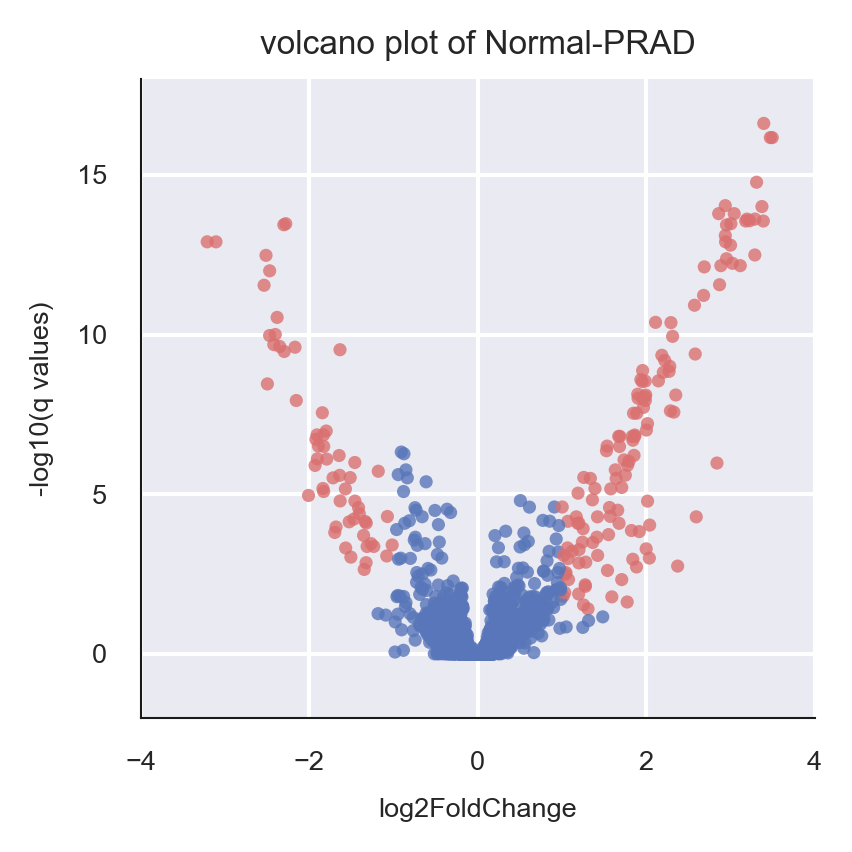

In [187]:
plt.rcParams['figure.dpi'] = 300 
fig,ax=plt.subplots(figsize=(3,3))
ax.scatter(de_plot_mx['log2FoldChange'], de_plot_mx['-log10(q values)'], c=de_plot_mx['color'],s=10,alpha=0.8,edgecolors='none')

std_plot(ax,'log2FoldChange','-log10(q values)','volcano plot of '+compare_group,ylim=[-2,18])
ax.tick_params(direction='out', pad=2)
fig.tight_layout()
fig.savefig(savepath+'volcano plot of '+compare_group+'.eps')

/apps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/apps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


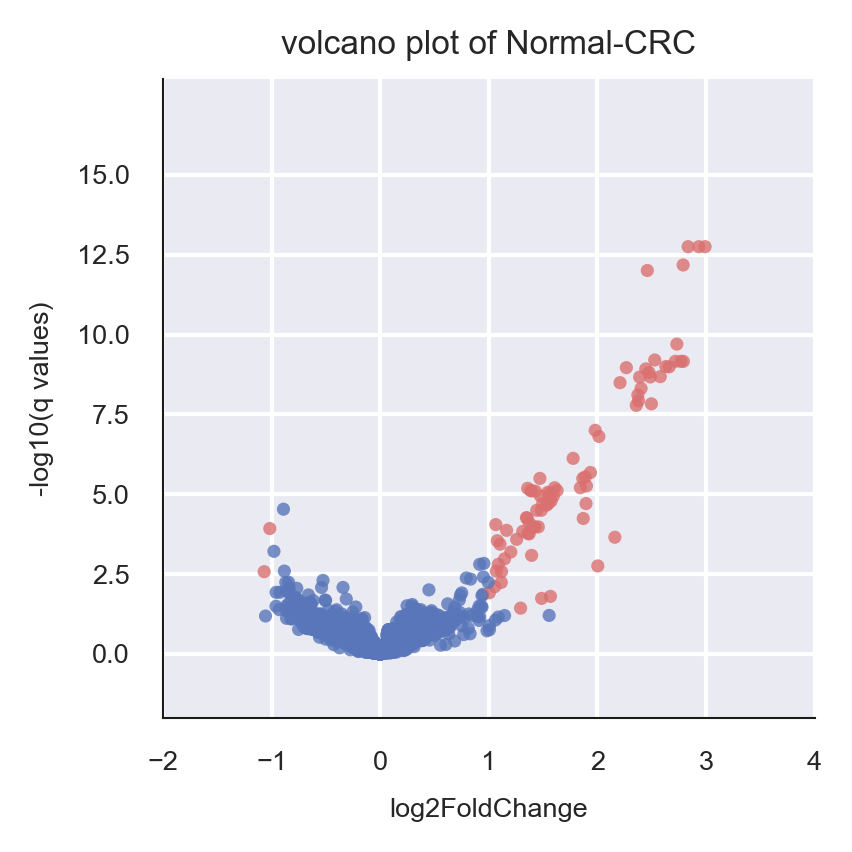

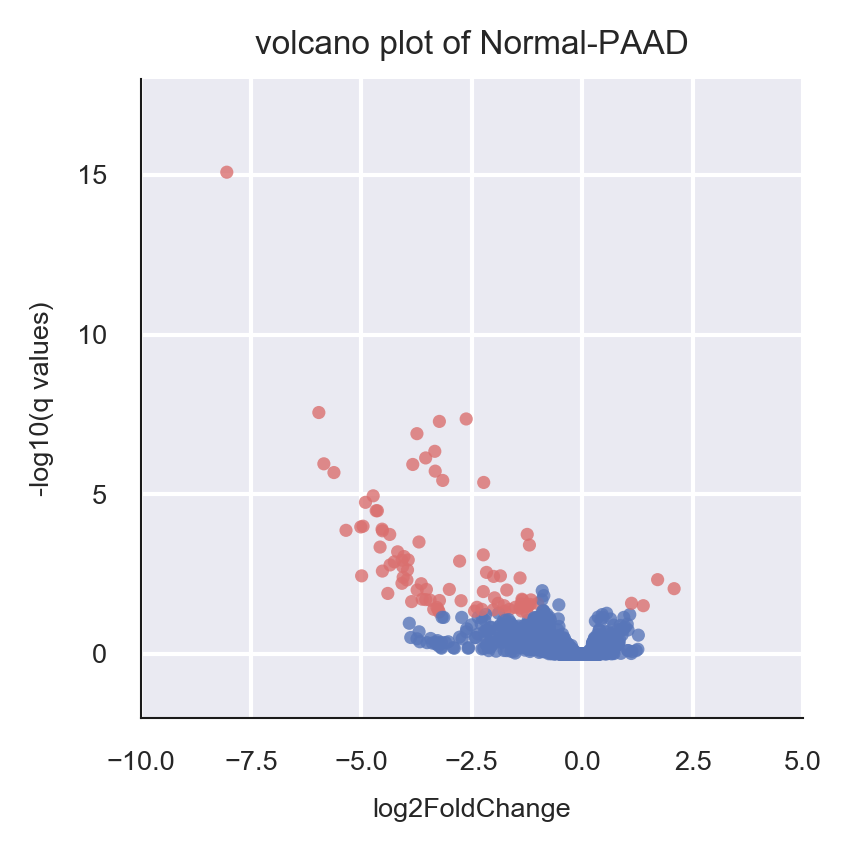

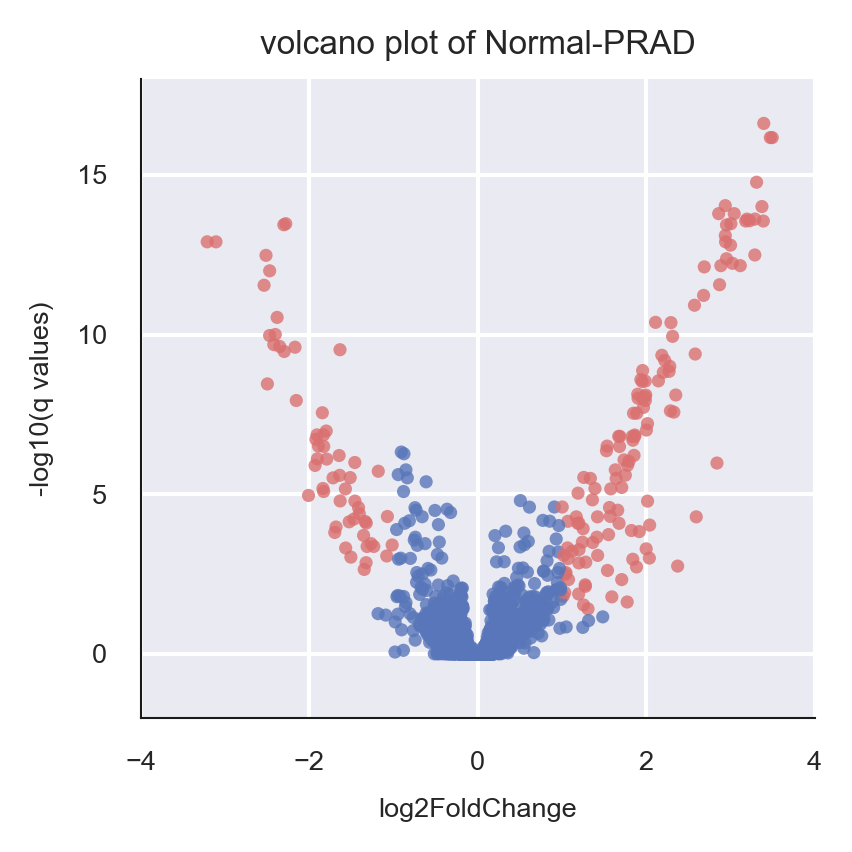

In [186]:
for compare_group in compare_group_list:
    detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                            ,index_col=0)
    de_plot_mx = pd.DataFrame(data={'feature':[name.split('|')[0] for name in detable.index.values],
                              'log2FoldChange':detable['log2FoldChange'].tolist(),
                              'padj':detable['padj'].tolist()})
    de_plot_mx.set_index('feature',inplace=True)
    de_plot_mx['threshold'] = (abs(de_plot_mx['log2FoldChange'])>1) & (de_plot_mx['padj']<0.05)
    de_plot_mx['-log10(q values)'] = [-math.log10(qvalue) for qvalue in de_plot_mx['padj'].tolist()]
    #de_plot_mx.iloc[np.where(de_plot_mx['threshold']==True)]
    de_plot_mx['color'] = de_plot_mx['threshold']
    for i in np.where(de_plot_mx['threshold']==True):
        de_plot_mx['color'][i]='#DA706F'
    for i in np.where(de_plot_mx['threshold']==False):
        de_plot_mx['color'][i]='#5876B9'

    fig,ax=plt.subplots(figsize=(3,3))
    ax.scatter(de_plot_mx['log2FoldChange'], de_plot_mx['-log10(q values)'], c=de_plot_mx['color'],s=10,alpha=0.8,edgecolors='none')

    std_plot(ax,'log2FoldChange','-log10(q values)','volcano plot of '+compare_group,ylim=[-2,18])
    ax.tick_params(direction='out', pad=2)
    fig.tight_layout()
    fig.savefig(savepath+'volcano plot of '+compare_group+'.eps')

# right volcano

In [1]:
from ggplot import *
import pandas  as pd
import  numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot

/apps/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/apps/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/apps/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
cd /home/xieyufeng/ex

/home/xieyufeng/ex


In [4]:
#小二－ 18. 三号－ 16. 小三－ 15. 四号－ 14. 小四－ 12. 五号－ 10.5 (pt)
# 72pt = 1in = 2.54cm
fonttitle = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 8}
fontlabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontticklabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontlegend = {'family':'Arial',
                  'weight' : 'normal', 
              #'linewidth':0.5,
                  'size' : 6.5}
fontcbarlabel = {'family':'Arial',
                 'weight' : 'normal', 
                 #'Rotation' : 270,
                 #'labelpad' : 25,
                 'size' : 6.5}
fontcbarticklabel = {'family':'Arial',#Helvetica
                 'weight' : 'normal', 
                 'size' : 5.5}
def std_plot(ax,xlabel,ylabel,title=None,
             legendtitle=None,bbox_to_anchor=None,
             labelspacing=1.2,borderpad=0,handletextpad=0,legendsort=True,markerscale=None,
             xlim=None,ylim=None,
             cbar=None,cbarlabel=None,
             moveyaxis=False,sns=False,left=True):
    #plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1.0'])
    pyplot.draw()
    #plt.figure(linewidth=30.5)
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xlabel(xlabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_ylabel(ylabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_xticklabels(ax.get_xticklabels(),fontticklabel)
    ax.set_yticklabels(ax.get_yticklabels(),fontticklabel)

    if moveyaxis is True:
        #fontticklabel字体会变
        ax.spines['left'].set_position(('data',0))
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(not left)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_color('k')
    
    ax.tick_params(direction='out', pad=-10)
    #ax.spines['bottom']._edgecolor="#000000"
    #ax.spines['left']._edgecolor="#000000"
    if title is not None:
        ax.set_title(title,fontdict = fonttitle)
    if legendtitle is not None:
        #if legendloc is None:
        #    legendloc="best"
        legend = ax.legend(title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
        ax.legend_.get_frame()._linewidth=0.5
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(6.5)
        if legendsort is True:
            # h: handle l:label
            h,l = ax.get_legend_handles_labels()
            l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h,l,title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)
        if sns is True:
            h,l = ax.get_legend_handles_labels()
            #l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h[1:],l[1:],title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)
    if xlim is not None:  
        ax.set(xlim=xlim)
    if ylim is not None:
        ax.set(ylim=ylim)
    if cbar is not None:
        #locator, formatter = cbar._get_ticker_locator_formatter()
        #ticks, ticklabels, offset_string = cbar._ticker(locator, formatter)
        #cbar.ax.spines['top'].set_visible(False)
        #cbar.ax.spines['right'].set_visible(False)
        #cbar.ax.spines['bottom'].set_visible(False)
        #cbar.ax.spines['left'].set_visible(False)
        cbar.ax.tick_params(direction='out', pad=3,width=0,length=0)
        cbar.set_label(cbarlabel,fontdict = fontcbarlabel,Rotation=270,labelpad=7.5)
        cbar.ax.set_yticks(cbar.ax.get_yticks())
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontcbarticklabel)
    return ax
def image_link(filename):
    fig.savefig(filename,dpi=300)
    return HTML('<a href="{0}" target="_blank" download="{0}">{0}</a>'.format(filename))

In [7]:
dataset='scirep'
sequencing_type = 'short'
if sequencing_type == 'short':
    exp_mx_name = 'domains_combined'
elif sequencing_type =='long':
    exp_mx_name = 'featurecounts'

if dataset =='scirep':
    compare_group_list = ['Normal-CRC','Normal-PAAD','Normal-PRAD']

In [8]:
import os
import datetime
now = datetime.datetime.now()
timenow = '{}.{}.{}.{}:{}'.format(now.year,now.month,now.day,now.hour,now.minute)
savepath = 'output/candidate/'+dataset+'/'+timenow+'/'
if not os.path.exists(savepath):
    os.mkdir(savepath)

/apps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/apps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


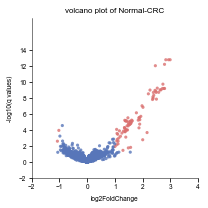

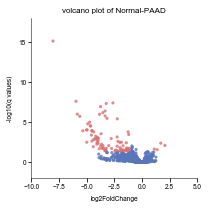

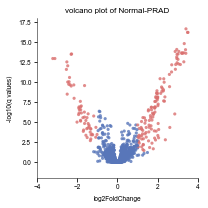

In [9]:
for compare_group in compare_group_list:
    detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                            ,index_col=0)
    de_plot_mx = pd.DataFrame(data={'feature':[name.split('|')[0] for name in detable.index.values],
                              'log2FoldChange':detable['log2FoldChange'].tolist(),
                              'padj':detable['padj'].tolist()})
    de_plot_mx.set_index('feature',inplace=True)
    de_plot_mx['threshold'] = (abs(de_plot_mx['log2FoldChange'])>1) & (de_plot_mx['padj']<0.05)
    de_plot_mx['-log10(q values)'] = [-math.log10(qvalue) for qvalue in de_plot_mx['padj'].tolist()]
    #de_plot_mx.iloc[np.where(de_plot_mx['threshold']==True)]
    de_plot_mx['color'] = de_plot_mx['threshold']
    for i in np.where(de_plot_mx['threshold']==True):
        de_plot_mx['color'][i]='#DA706F'
    for i in np.where(de_plot_mx['threshold']==False):
        de_plot_mx['color'][i]='#5876B9'

    fig,ax=plt.subplots(figsize=(3,3))
    ax.scatter(de_plot_mx['log2FoldChange'], de_plot_mx['-log10(q values)'], c=de_plot_mx['color'],s=10,alpha=0.8,edgecolors='none')

    std_plot(ax,'log2FoldChange','-log10(q values)','volcano plot of '+compare_group,ylim=[-2,18])
    ax.tick_params(direction='out', pad=2)
    fig.tight_layout()
    fig.savefig(savepath+'volcano plot of '+compare_group+'.eps')

In [103]:
%%R
library(ggplot2)
print(de_plot_mx)
ggplot(de_plot_mx,aes(x='log2FoldChange', y='-log10(q values)', colour='threshold')) + geom_point(alpha=0.8, size=15) 



#+theme_bw() 
#+geom_density()
#+ facet_wrap('threshold',ncol=2)

#+ opts(panel.background = 'white')


Error in print(de_plot_mx) : object 'de_plot_mx' not found


/apps/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in print(de_plot_mx) : object 'de_plot_mx' not found

  warnings.warn(x, RRuntimeWarning)


# heatmap

In [195]:
def display_dataframe(df, filename=None, encoding='utf-8', format='csv', type='button', **kwargs):
    #display(df)
    display(df.style.set_caption(filename))
    if filename is None:
        filename = "dataframe"
    if format == 'csv':
        data = df.to_csv(**kwargs)
        mime_type = 'text/csv'
        filename = filename + '.csv'
    elif format == 'tsv':
        data = df.to_csv(sep='\t', **kwargs)
        mime_type = 'text/plain'
        filename = filename + '.txt'
    else:
        raise ValueError('unknown file format: {}'.format(format))
    data = 'data:{mime_type};base64,'.format(mime_type=mime_type) + str(b64encode(bytes(data, encoding=encoding)), encoding=encoding)
    if type == 'hyperlink':
        display(HTML('<a href="{data}" download={filename} target="_blank">{filename}</a>'.format(
            mime_type=mime_type, filename=filename, data=data)))
    elif type == 'button':
        button_id = 'button_{}'.format(np.random.randint(1000000000))
        display(HTML(r'<input type="button" id="{0}" value="Download">'.format(button_id)))
        display(HTML('''<script>
    document.getElementById("{button_id}").addEventListener("click", function(event){{
        var filename = "{filename}";
        var data = "{data}";
        const element = document.createElement('a');
        element.setAttribute('href', data);
        element.setAttribute('download', filename);
        element.style.display = 'none';
        document.body.appendChild(element);
        element.click();
        document.body.removeChild(element);
    }});
</script>'''.format(button_id=button_id, filename=filename, data=data)))

In [196]:
a = de_plot_mx.sort_values('-log10(q values)',ascending=False)

In [204]:
a.iloc

,log2FoldChange,padj,threshold,-log10(q values),color
feature,,,,,
chr5_66024760_66024800_-,3.397806,2.433545e-17,True,16.613761,#DA706F
chr11_122338800_122338840_-,3.475704,6.761661e-17,True,16.169947,#DA706F
chr2_198399600_198399620_-,3.498353,6.761661e-17,True,16.169947,#DA706F
ENSG00000235902.1,3.312538,1.692337e-15,True,14.771513,#DA706F
ENSG00000248148.1,2.941004,9.158109e-15,True,14.038194,#DA706F
chrX_137358980_137359020_+,3.376206,9.782517e-15,True,14.009549,#DA706F
chr9_84980980_84981020_-,3.047043,1.631453e-14,True,13.787426,#DA706F
chr5_61290640_61290680_+,2.862696,1.631453e-14,True,13.787426,#DA706F
chr14_24413040_24413080_-,3.198957,2.414120e-14,True,13.617241,#DA706F


In [255]:
def display_dataframe(df, filename=None, encoding='utf-8', format='csv', type='button',gradientfunc=False, **kwargs):
    #display(df)
    #if isinstance(df, pd.DataFrame):
    #    display(df.style.set_caption(filename))
    #else:
    if gradientfunc == False:
        display(df.style.set_caption(filename))    
    else:
        display(df.style.format(gradient_func).set_caption(filename)) 
    if filename is None:
        filename = "dataframe"
    if format == 'csv':
        data = df.to_csv(**kwargs)
        mime_type = 'text/csv'
        filename = filename + '.csv'
    elif format == 'tsv':
        data = df.to_csv(**kwargs)
        mime_type = 'text/plain'
        filename = filename + '.txt'
    else:
        raise ValueError('unknown file format: {}'.format(format))
    data = 'data:{mime_type};base64,'.format(mime_type=mime_type) + str(b64encode(bytes(data, encoding=encoding)), encoding=encoding)
    if type == 'hyperlink':
        display(HTML('<a href="{data}" download={filename} target="_blank">{filename}</a>'.format(
            mime_type=mime_type, filename=filename, data=data)))
    elif type == 'button':
        button_id = 'button_{}'.format(np.random.randint(1000000000))
        display(HTML(r'<input type="button" id="{0}" value="Download">'.format(button_id)))
        display(HTML('''<script>
    document.getElementById("{button_id}").addEventListener("click", function(event){{
        var filename = "{filename}";
        var data = "{data}";
        const element = document.createElement('a');
        element.setAttribute('href', data);
        element.setAttribute('download', filename);
        element.style.display = 'none';
        document.body.appendChild(element);
        element.click();
        document.body.removeChild(element);
    }});
</script>'''.format(button_id=button_id, filename=filename, data=data)))

In [243]:
def gradient_func(val):
    return '<span style="background: linear-gradient(90deg, #d65f5f {0}%, transparent 0%)">{0:.3f}</span>'.format(val)


In [256]:
from base64 import b64encode, b64decode
from IPython.display import HTML, display, FileLink
#display(a.iloc.style.set_caption('Percentage by clean reads'))
display_dataframe(pd.DataFrame(a['log2FoldChange'][1:3]), filename="dataframe",gradientfunc=True)

,log2FoldChange
feature,
chr11_122338800_122338840_-,3.476
chr2_198399600_198399620_-,3.498


In [225]:
a.iloc[1:3].style.

AttributeError: 'Styler' object has no attribute 'style'

In [218]:
isinstance(a.iloc[1:3], pd.DataFrame)

True

In [11]:
np.where(de_plot_mx.sort_values('-log10(q values)',ascending=False)['threshold']==True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 102, 104, 105, 106, 107,
        108, 110, 111, 113, 114, 115, 116, 117, 119, 120, 121, 122, 124,
        125, 126, 127, 130, 131, 134, 138, 139, 140, 142, 143, 144, 145,
        149, 150, 151, 152, 153, 154, 155, 158, 160, 161, 163, 165, 166,
        168, 169, 171, 177, 178, 179, 182, 184, 185, 188, 189, 190, 191,
        192, 196, 197, 198, 199, 201, 204, 206, 210, 211, 212, 213, 214,
        219, 221, 227, 229, 233, 234, 241, 246, 265

In [12]:
detable.sort_values('padj').iloc[np.where(de_plot_mx.sort_values('-log10(q values)',ascending=False)['threshold']==True)].index


Index(['chr5_66024760_66024800_-|genomic|chr5_66024760_66024800_-|peak_4433|chr5|66024760|66024800',
       'chr2_198399600_198399620_-|genomic|chr2_198399600_198399620_-|peak_3643|chr2|198399600|198399620',
       'chr11_122338800_122338840_-|genomic|chr11_122338800_122338840_-|peak_2439|chr11|122338800|122338840',
       'ENSG00000235902.1|lncRNA|AC108472.1|peak_935|ENST00000447277.1|240|280',
       'ENSG00000248148.1|lncRNA|AC114954.1|peak_1131|ENST00000506656.1|20|40',
       'chrX_137358980_137359020_+|genomic|chrX_137358980_137359020_+|peak_5426|chrX|137358980|137359020',
       'chr9_84980980_84981020_-|genomic|chr9_84980980_84981020_-|peak_5194|chr9|84980980|84981020',
       'chr5_61290640_61290680_+|genomic|chr5_61290640_61290680_+|peak_4429|chr5|61290640|61290680',
       'chr18_38994840_38994880_+|genomic|chr18_38994840_38994880_+|peak_3260|chr18|38994840|38994880',
       'chr14_24413040_24413080_-|genomic|chr14_24413040_24413080_-|peak_2722|chr14|24413040|24413080',
    

## matrix input

In [9]:
original_mx_file = 'output/'+dataset+'/count_matrix/'+exp_mx_name+'.txt'
original_mx = pd.read_table(original_mx_file,index_col=0)

In [10]:
original_mx

,Sample_1S3,Sample_1S6,Sample_1S9,Sample_1S12,Sample_1S15,Sample_1S18,Sample_1S21,Sample_1S24,Sample_4S2,Sample_4S5,...,Sample_4S16,Sample_4S19,Sample_4S22,Sample_4S25,Sample_N49,Sample_Pan05,Sample_Pan06,Sample_PC6,Sample_PC12,Sample_PC26
feature,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a-2-3p|miRNA|hsa-let-7a-2-3p|hsa-let-7a-2-3p|hsa-let-7a-2-3p|0|22,9,14,3,1,6,1,6,8,14,6,...,18,3,6,5,11,1,1,7,12,10
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p|hsa-let-7a-3p|0|21,283,503,214,153,451,165,435,564,659,421,...,733,185,224,685,837,186,166,294,647,498
hsa-let-7a-5p|miRNA|hsa-let-7a-5p|hsa-let-7a-5p|hsa-let-7a-5p|0|22,2460,6617,2140,1718,3872,1757,4559,6526,6476,7779,...,11828,1815,2512,6301,7514,1539,1457,2386,5836,4888
hsa-let-7b-3p|miRNA|hsa-let-7b-3p|hsa-let-7b-3p|hsa-let-7b-3p|0|22,230,340,147,219,207,122,189,278,335,458,...,504,174,278,308,367,124,128,265,395,219
hsa-let-7b-5p|miRNA|hsa-let-7b-5p|hsa-let-7b-5p|hsa-let-7b-5p|0|22,56569,55954,51215,55669,23908,25192,32174,58741,53344,45357,...,63867,37678,43107,37548,61921,16446,16151,59529,59295,57452
hsa-let-7c-3p|miRNA|hsa-let-7c-3p|hsa-let-7c-3p|hsa-let-7c-3p|0|22,29,53,32,20,29,12,25,39,69,60,...,56,26,15,49,85,11,18,27,57,24
hsa-let-7c-5p|miRNA|hsa-let-7c-5p|hsa-let-7c-5p|hsa-let-7c-5p|0|22,3312,5772,2920,2358,2902,1783,3801,5788,5670,5491,...,8338,2396,3010,5211,6180,1286,1449,3413,7459,8590
hsa-let-7d-3p|miRNA|hsa-let-7d-3p|hsa-let-7d-3p|hsa-let-7d-3p|0|22,2222,3826,1630,1255,2124,1065,1916,2713,3902,5412,...,4763,1629,2012,2946,3725,987,944,2687,4298,1958
hsa-let-7d-5p|miRNA|hsa-let-7d-5p|hsa-let-7d-5p|hsa-let-7d-5p|0|22,946,1625,736,572,1082,637,1307,1933,1647,2050,...,3332,866,997,1786,2042,570,502,950,1767,1571


## norm

In [11]:
factor = original_mx.sum(axis=0)/np.mean(original_mx.sum(axis=0))

In [12]:
norm_mx = (original_mx/factor+1).apply(np.log2,0)

## select cmp

In [13]:
class_info = 'data/'+dataset+'/sample_classes.txt'
sample_class = pd.read_table(class_info,sep='\t',index_col=0)

In [14]:
np.unique(sample_class['label'].tolist())

array(['Colorectal Cancer Stage 1', 'Colorectal Cancer Stage 2',
       'Colorectal Cancer Stage 3', 'Colorectal Cancer Stage 4',
       'Healthy Control', 'Pancreatic Cancer', 'Prostate Cancer'],
      dtype='<U25')

In [15]:
compare_group_list = ['Normal-CRC','Normal-PAAD','Normal-PRAD']

In [16]:
if compare_group == 'Normal-CRC':
    class_select = ['Healthy Control','Colorectal Cancer']
if compare_group == 'Normal-PAAD':
    class_select = ['Healthy Control','Pancreatic Cancer']
if compare_group == 'Normal-PRAD':
    class_select = ['Healthy Control','Prostate Cancer']

In [17]:
for i in norm_mx.columns:
    if not np.isin(sample_class.loc[i]['label'],class_select):
        norm_mx = norm_mx.drop(columns=[i])
norm_mx

,Sample_N1,Sample_N7,Sample_N13,Sample_N19,Sample_N25,Sample_N31,Sample_N37,Sample_N43,Sample_N2,Sample_N8,...,Sample_N50,Sample_PC5,Sample_PC11,Sample_PC17,Sample_PC25,Sample_PC35,Sample_N49,Sample_PC6,Sample_PC12,Sample_PC26
feature,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a-2-3p|miRNA|hsa-let-7a-2-3p|hsa-let-7a-2-3p|hsa-let-7a-2-3p|0|22,3.676977,2.744194,3.437094,2.921361,2.209867,2.256340,3.112663,2.768850,2.358114,3.036688,...,4.241468,1.637259,3.308509,3.512933,3.029209,1.859177,3.707574,2.947727,4.043982,3.512524
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p|hsa-let-7a-3p|0|21,9.024253,8.572246,9.115858,8.974236,9.157952,8.649057,7.981155,8.258902,8.789822,8.024685,...,9.048476,6.897259,9.908425,9.390319,8.717565,8.214750,9.843913,8.144881,9.708143,9.021077
hsa-let-7a-5p|miRNA|hsa-let-7a-5p|hsa-let-7a-5p|hsa-let-7a-5p|0|22,12.232525,12.419957,12.470298,12.422443,12.190294,12.001037,11.519368,12.105685,11.911200,11.781538,...,12.497256,10.179657,12.996137,12.222801,12.154172,11.477068,13.008798,11.161111,12.879751,12.313607
hsa-let-7b-3p|miRNA|hsa-let-7b-3p|hsa-let-7b-3p|hsa-let-7b-3p|0|22,8.429333,8.559224,8.306902,8.515487,7.545730,8.015880,7.686599,8.021236,7.902881,8.064063,...,8.497025,7.216765,9.114392,8.547763,8.055575,7.704682,8.656474,7.995614,8.997330,7.839395
hsa-let-7b-5p|miRNA|hsa-let-7b-5p|hsa-let-7b-5p|hsa-let-7b-5p|0|22,15.868153,16.068318,15.909565,15.962080,14.859877,14.807758,15.250916,15.395295,15.768512,16.043741,...,16.064119,15.550757,16.321450,15.993870,15.363642,15.008339,16.051420,15.801432,16.224437,15.868389
hsa-let-7c-3p|miRNA|hsa-let-7c-3p|hsa-let-7c-3p|hsa-let-7c-3p|0|22,6.010918,5.644471,6.007988,5.744291,5.032557,5.473932,5.237217,5.204107,5.436352,4.499410,...,5.947487,3.879688,5.916065,6.120379,4.845943,4.341420,6.558042,4.749640,6.221154,4.699864
hsa-let-7c-5p|miRNA|hsa-let-7c-5p|hsa-let-7c-5p|hsa-let-7c-5p|0|22,12.182453,12.227606,12.190780,12.465571,11.756014,11.701379,12.061685,12.251615,12.038727,12.238386,...,12.582599,11.090338,12.873066,12.691693,12.035790,11.792407,12.726862,11.677367,13.233711,13.126899
hsa-let-7d-3p|miRNA|hsa-let-7d-3p|hsa-let-7d-3p|hsa-let-7d-3p|0|22,12.042445,11.756495,11.591916,12.054713,10.922647,11.230455,11.055037,11.128048,11.583751,11.554284,...,11.754734,10.495547,12.318800,11.769821,11.080954,10.733924,11.996636,11.332442,12.438505,10.994168
hsa-let-7d-5p|miRNA|hsa-let-7d-5p|hsa-let-7d-5p|hsa-let-7d-5p|0|22,10.484890,10.627736,10.631155,10.708563,10.309825,10.215668,9.960344,10.310362,10.486967,10.209738,...,10.710004,9.287076,11.088377,10.573912,10.516749,9.987847,11.129669,9.833468,11.156514,10.676644


In [18]:
norm_mx.shape

(19241, 86)

In [19]:
from scipy import stats
norm_z_mx = norm_mx.apply(stats.zscore,1)
norm_z_mx

/apps/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,Sample_N1,Sample_N7,Sample_N13,Sample_N19,Sample_N25,Sample_N31,Sample_N37,Sample_N43,Sample_N2,Sample_N8,...,Sample_N50,Sample_PC5,Sample_PC11,Sample_PC17,Sample_PC25,Sample_PC35,Sample_N49,Sample_PC6,Sample_PC12,Sample_PC26
feature,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a-2-3p|miRNA|hsa-let-7a-2-3p|hsa-let-7a-2-3p|hsa-let-7a-2-3p|0|22,0.779070,-0.426082,0.469142,-0.197183,-1.116430,-1.056387,0.049979,-0.394227,-0.924896,-0.048180,...,1.508389,-1.856237,0.303011,0.567126,-0.057843,-1.569520,0.818601,-0.163118,1.253238,0.566596
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p|hsa-let-7a-3p|0|21,0.283813,-0.387338,0.419831,0.209547,0.482334,-0.273287,-1.265006,-0.852600,-0.064275,-1.200371,...,0.319780,-2.874403,1.596656,0.827358,-0.171565,-0.918157,1.500866,-1.021902,1.299271,0.279098
hsa-let-7a-5p|miRNA|hsa-let-7a-5p|hsa-let-7a-5p|hsa-let-7a-5p|0|22,0.199718,0.499998,0.580649,0.503981,0.132061,-0.171143,-0.942813,-0.003488,-0.315069,-0.522796,...,0.623838,-3.089134,1.423083,0.184140,0.074192,-1.010582,1.443368,-1.516769,1.236624,0.329619
hsa-let-7b-3p|miRNA|hsa-let-7b-3p|hsa-let-7b-3p|hsa-let-7b-3p|0|22,0.614482,0.934948,0.312422,0.827040,-1.565528,-0.405582,-1.217979,-0.392368,-0.684370,-0.286705,...,0.781491,-2.377146,2.304649,0.906672,-0.307646,-1.173365,1.174881,-0.455581,2.015834,-0.841002
hsa-let-7b-5p|miRNA|hsa-let-7b-5p|hsa-let-7b-5p|hsa-let-7b-5p|0|22,0.317943,0.728282,0.402837,0.510493,-1.749032,-1.855877,-0.947399,-0.651421,0.113678,0.677900,...,0.719675,-0.332723,1.247205,0.575665,-0.716309,-1.444683,0.693643,0.181165,1.048328,0.318426
hsa-let-7c-3p|miRNA|hsa-let-7c-3p|hsa-let-7c-3p|hsa-let-7c-3p|0|22,1.008723,0.467355,1.004394,0.614823,-0.436652,0.215410,-0.134299,-0.183214,0.159892,-1.224293,...,0.915013,-2.139834,0.868593,1.170434,-0.712344,-1.457698,1.817012,-0.854618,1.319314,-0.928153
hsa-let-7c-5p|miRNA|hsa-let-7c-5p|hsa-let-7c-5p|hsa-let-7c-5p|0|22,0.024976,0.111765,0.040981,0.569154,-0.794675,-0.899688,-0.207149,0.157911,-0.251277,0.132485,...,0.794090,-2.074162,1.352394,1.003779,-0.256923,-0.724726,1.071377,-0.945841,2.045585,1.840282
hsa-let-7d-3p|miRNA|hsa-let-7d-3p|hsa-let-7d-3p|hsa-let-7d-3p|0|22,1.319509,0.733039,0.395494,1.344670,-0.977146,-0.345846,-0.705619,-0.555876,0.378749,0.318314,...,0.729427,-1.853107,1.886300,0.760370,-0.652465,-1.364208,1.225557,-0.136674,2.131810,-0.830459
hsa-let-7d-5p|miRNA|hsa-let-7d-5p|hsa-let-7d-5p|hsa-let-7d-5p|0|22,0.111606,0.426369,0.433901,0.604470,-0.274151,-0.481627,-1.044236,-0.272968,0.116181,-0.494694,...,0.607646,-2.527789,1.441394,0.307767,0.181808,-0.983632,1.532382,-1.323808,1.591534,0.534138


In [20]:
de_mx = norm_z_mx.loc[detable.sort_values('padj').iloc[np.where(de_plot_mx.sort_values('-log10(q values)',ascending=False)['threshold']==True)].index]


NameError: name 'de_plot_mx' is not defined

In [21]:
de_mx

NameError: name 'de_mx' is not defined

## colorbar

In [189]:
 type_select = pd.DataFrame(sample_class.loc[i] for i in de_mx.columns)

In [190]:
type_color = dict(zip(np.unique(type_select), ("#DA706F","#5876B9")))

In [191]:
column_colors = type_select['label'].map(type_color)

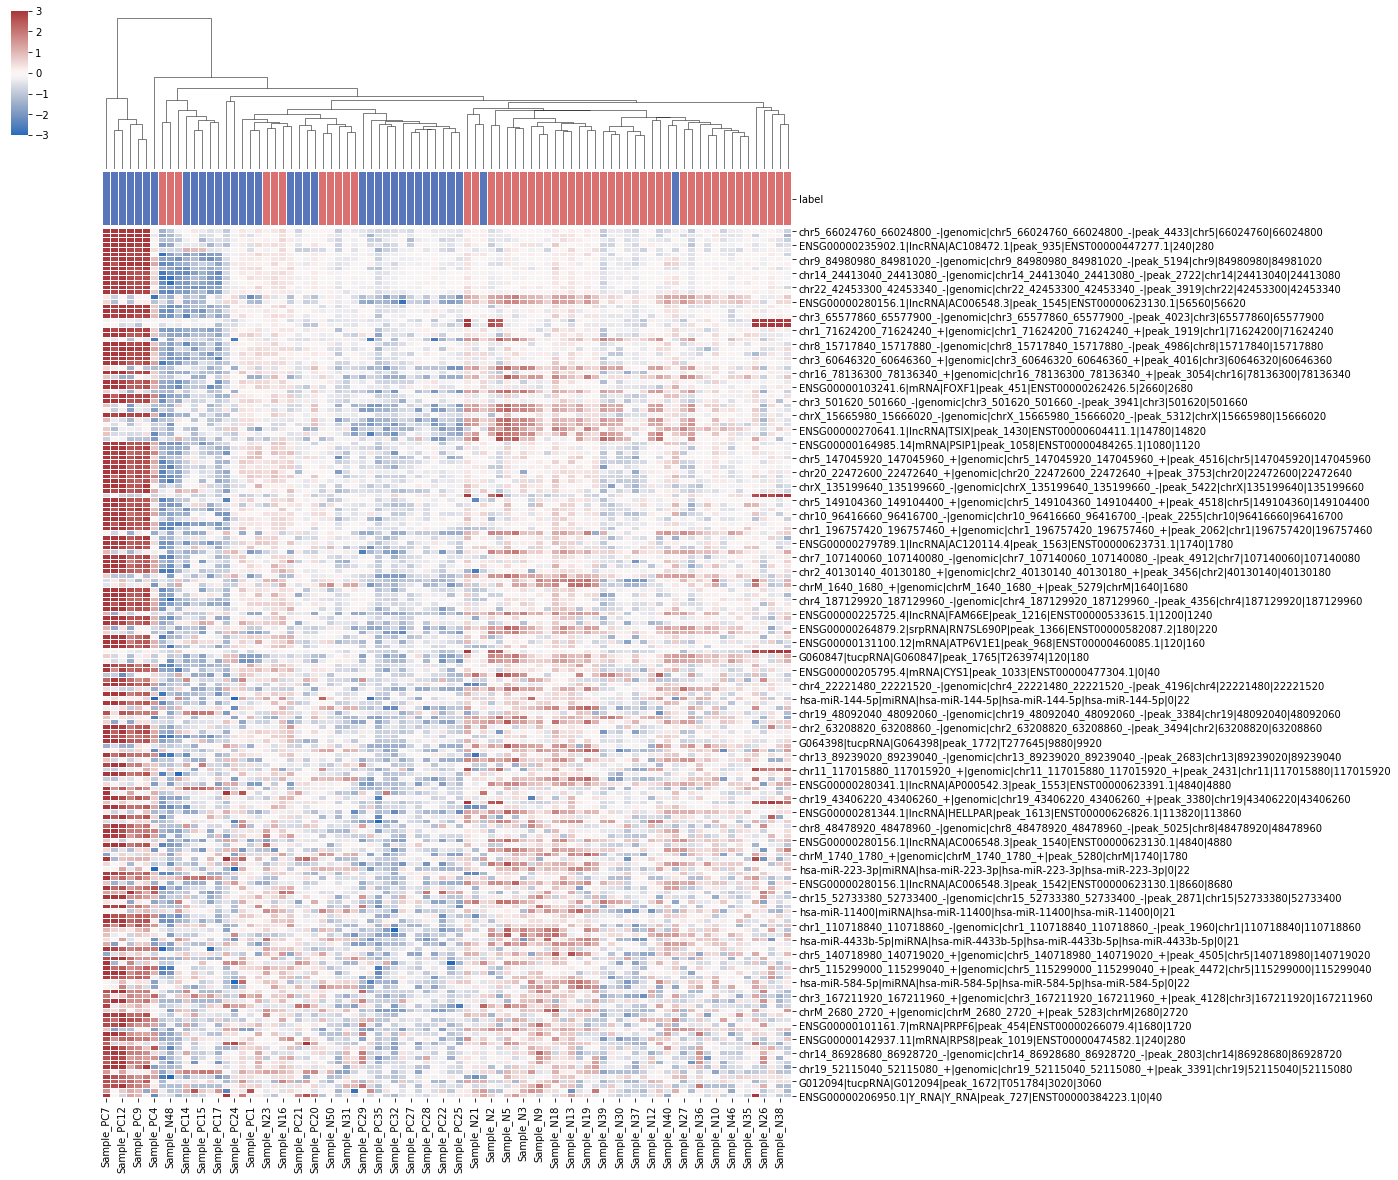

In [194]:
import seaborn as sns
sns.clustermap(de_mx, row_cluster=False,cmap="vlag",figsize=(14,20),
               col_colors=column_colors,linewidths=.005,vmax=3,vmin=-3)#,z_score=0)

In [32]:
class_select

['Healthy Control', 'Prostate Cancer']

In [177]:
np.isin(sample_class.loc["Sample_1S3"]['label'],class_select) == False

True

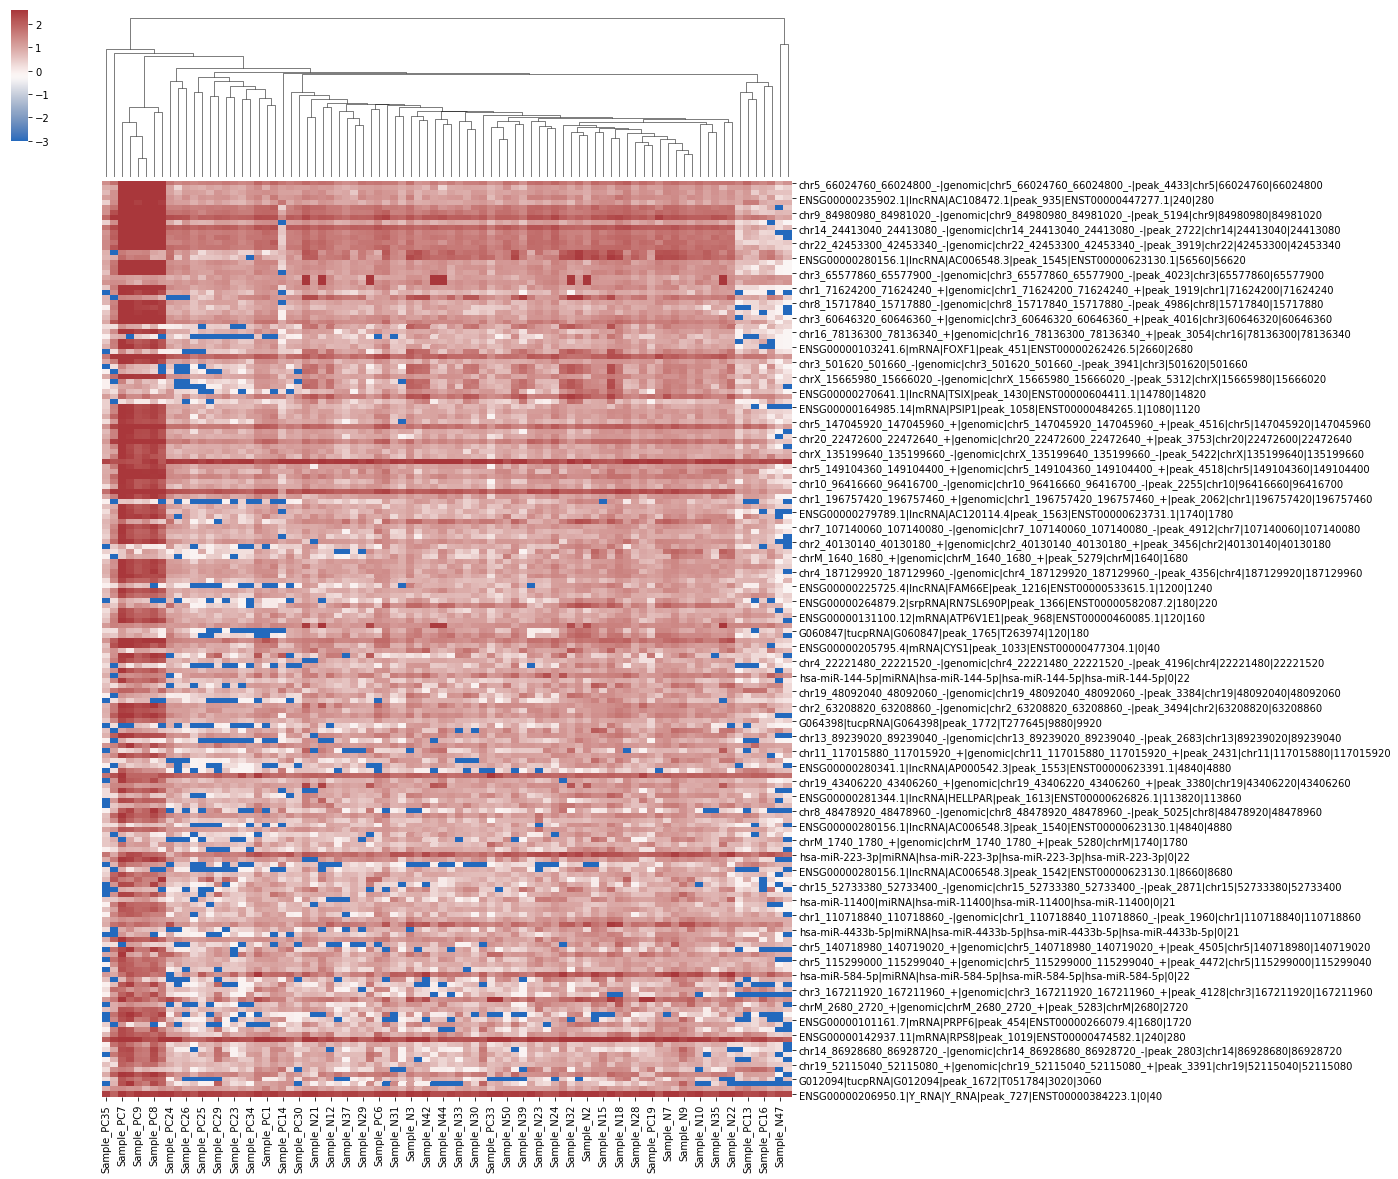

In [64]:
import seaborn as sns
sns.clustermap(de_mx, row_cluster=False,cmap="vlag",robust=True,figsize=(14,20))

In [92]:
 type_select = pd.DataFrame(sample_class.loc[i] for i in de_mx.columns)

In [93]:
type_select

,label
Sample_N1,Healthy Control
Sample_N7,Healthy Control
Sample_N13,Healthy Control
Sample_N19,Healthy Control
Sample_N25,Healthy Control
Sample_N31,Healthy Control
Sample_N37,Healthy Control
Sample_N43,Healthy Control
Sample_N2,Healthy Control
Sample_N8,Healthy Control


In [94]:
np.unique(type_select)

array(['Healthy Control', 'Prostate Cancer'], dtype=object)

In [112]:
type_color = dict(zip(np.unique(type_select), ("#DA706F","#5876B9")))

In [113]:
type_color

{'Healthy Control': '#DA706F', 'Prostate Cancer': '#5876B9'}

In [114]:
type_select['label']

Sample_N1      Healthy Control
Sample_N7      Healthy Control
Sample_N13     Healthy Control
Sample_N19     Healthy Control
Sample_N25     Healthy Control
Sample_N31     Healthy Control
Sample_N37     Healthy Control
Sample_N43     Healthy Control
Sample_N2      Healthy Control
Sample_N8      Healthy Control
Sample_N14     Healthy Control
Sample_N20     Healthy Control
Sample_N26     Healthy Control
Sample_N32     Healthy Control
Sample_N38     Healthy Control
Sample_N44     Healthy Control
Sample_N3      Healthy Control
Sample_N9      Healthy Control
Sample_N15     Healthy Control
Sample_N21     Healthy Control
Sample_N27     Healthy Control
Sample_N33     Healthy Control
Sample_N39     Healthy Control
Sample_N45     Healthy Control
Sample_PC1     Prostate Cancer
Sample_PC7     Prostate Cancer
Sample_PC13    Prostate Cancer
Sample_PC18    Prostate Cancer
Sample_PC21    Prostate Cancer
Sample_PC27    Prostate Cancer
                    ...       
Sample_PC9     Prostate Cancer
Sample_P

In [115]:
column_colors = type_select['label'].map(type_color)


In [116]:
pd.DataFrame(column_colors)

,label
Sample_N1,#DA706F
Sample_N7,#DA706F
Sample_N13,#DA706F
Sample_N19,#DA706F
Sample_N25,#DA706F
Sample_N31,#DA706F
Sample_N37,#DA706F
Sample_N43,#DA706F
Sample_N2,#DA706F
Sample_N8,#DA706F


In [77]:
type_color

{'Healthy Control': 'r', 'Prostate Cancer': 'b'}

In [150]:
de_mx

,Sample_N1,Sample_N7,Sample_N13,Sample_N19,Sample_N25,Sample_N31,Sample_N37,Sample_N43,Sample_N2,Sample_N8,...,Sample_N50,Sample_PC5,Sample_PC11,Sample_PC17,Sample_PC25,Sample_PC35,Sample_N49,Sample_PC6,Sample_PC12,Sample_PC26
chr5_66024760_66024800_-|genomic|chr5_66024760_66024800_-|peak_4433|chr5|66024760|66024800,0.067868,-0.046713,0.140654,0.217309,-0.523521,-0.214847,-0.741102,-0.331838,-0.552761,-0.080763,...,0.014367,-0.233466,2.647485,-0.341109,-0.408193,-0.697266,-0.187804,-0.115628,2.975363,-0.379470
chr2_198399600_198399620_-|genomic|chr2_198399600_198399620_-|peak_3643|chr2|198399600|198399620,0.049007,0.305643,0.275673,0.214344,-0.419146,-0.217375,-0.597065,-0.017146,-0.403399,-0.708678,...,0.179600,-0.196462,2.596244,-0.092725,-0.571747,-0.510136,-0.625729,-0.065768,2.923002,-0.264064
chr11_122338800_122338840_-|genomic|chr11_122338800_122338840_-|peak_2439|chr11|122338800|122338840,-0.329370,0.366002,0.217557,-0.047775,-0.520522,-0.105919,-0.389776,-0.284559,-0.512966,-0.210558,...,-0.389231,-0.029197,2.693172,-0.479950,-0.284001,-0.800390,-0.910174,0.187401,2.895137,-0.181445
ENSG00000235902.1|lncRNA|AC108472.1|peak_935|ENST00000447277.1|240|280,0.077859,-0.145274,-0.002182,0.114339,-0.387284,0.008378,-0.644426,-0.341007,-0.855569,-0.464211,...,-0.037988,-0.281841,2.594102,-0.671708,-0.240776,-0.455327,-0.399154,-0.158236,3.010521,-0.100508
ENSG00000248148.1|lncRNA|AC114954.1|peak_1131|ENST00000506656.1|20|40,0.111825,-0.008225,0.389724,0.058362,-0.489616,-0.057005,-0.480384,-0.518004,-0.393464,-0.410235,...,-0.165982,-0.749566,2.344869,-0.451259,-0.246593,-1.326780,-0.722235,-0.044921,2.853457,-0.249114
chrX_137358980_137359020_+|genomic|chrX_137358980_137359020_+|peak_5426|chrX|137358980|137359020,0.120068,0.310278,0.325740,0.469743,0.020605,-0.025362,-0.280138,-0.164005,0.012017,0.105157,...,0.172635,-0.070301,2.336700,-1.346193,-0.093132,-0.452533,-0.896451,0.252038,2.608970,-0.008420
chr9_84980980_84981020_-|genomic|chr9_84980980_84981020_-|peak_5194|chr9|84980980|84981020,-0.202901,0.140137,0.320669,0.125482,-0.148017,-0.286798,-0.472250,-0.205529,-0.121161,0.014748,...,0.114261,0.437245,2.408158,-1.341453,-0.392317,-0.630991,-1.666108,0.252662,2.698483,0.113375
chr5_61290640_61290680_+|genomic|chr5_61290640_61290680_+|peak_4429|chr5|61290640|61290680,-0.214809,0.085134,0.186284,0.121019,-0.336846,-0.293008,-0.560595,-0.084886,-0.418718,0.104773,...,-0.193226,0.501847,2.564811,-1.381304,-0.236494,-0.414839,-1.219437,0.284553,2.925094,0.116582
chr18_38994840_38994880_+|genomic|chr18_38994840_38994880_+|peak_3260|chr18|38994840|38994880,0.244993,0.207100,0.179706,0.137726,-0.326389,-0.166399,-0.236901,0.012951,-0.111870,-0.330235,...,-0.270357,-0.406714,2.361282,-1.076329,-0.412674,-0.884635,-1.759980,0.523059,2.715298,0.266075
chr14_24413040_24413080_-|genomic|chr14_24413040_24413080_-|peak_2722|chr14|24413040|24413080,-0.146390,0.141005,0.277897,0.225429,-0.140242,0.075598,-0.117471,0.085902,-0.162923,-0.027185,...,0.182224,0.111280,2.229023,-1.825084,0.031286,-0.381108,-1.717505,0.286012,2.461336,0.079160


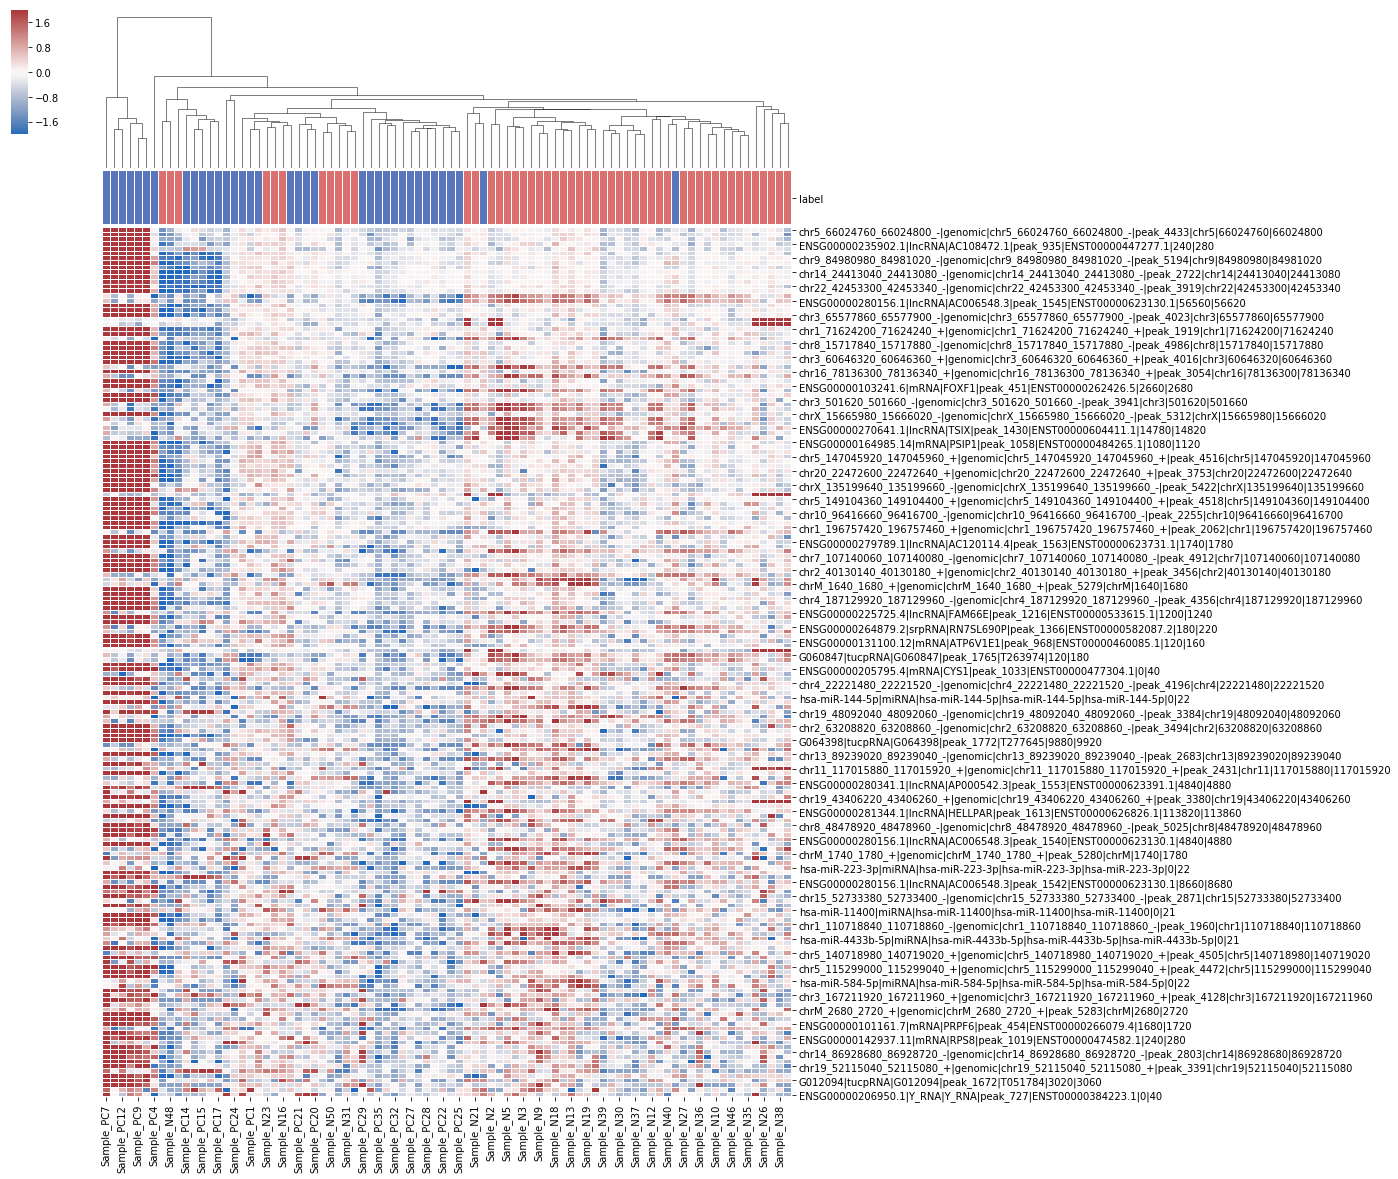

In [155]:
sns.clustermap(de_mx, row_cluster=False,cmap="vlag",figsize=(14,20),
               col_colors=column_colors,linewidths=.005,vmax=2,vmin=-2,z_score=0)

## my attempt

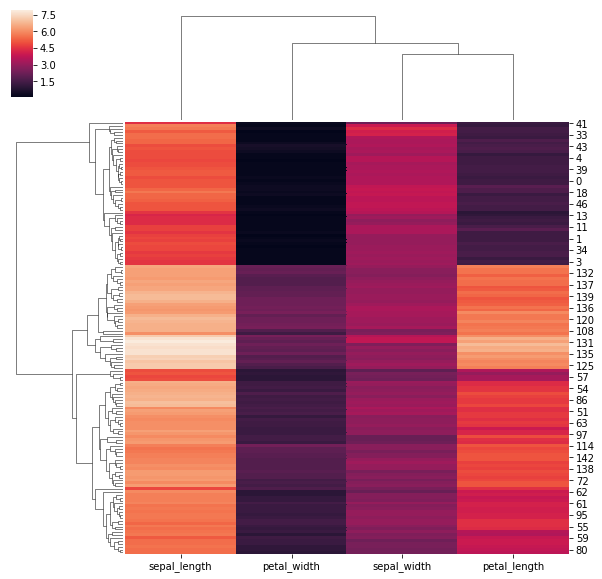

In [286]:
import seaborn as sns; #sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")
#fig,ax=plt.subplots(figsize=(7,7))
g = sns.clustermap(iris)
plt.tight_layout()

In [288]:
g.show()

AttributeError: 'ClusterGrid' object has no attribute 'show'

In [61]:
species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [74]:
species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [49]:
lut = dict(zip(species.unique(), "rbg"))

In [60]:
species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [50]:
row_colors = species.map(lut)

In [86]:
row_colors

0      r
1      r
2      r
3      r
4      r
5      r
6      r
7      r
8      r
9      r
10     r
11     r
12     r
13     r
14     r
15     r
16     r
17     r
18     r
19     r
20     r
21     r
22     r
23     r
24     r
25     r
26     r
27     r
28     r
29     r
      ..
120    g
121    g
122    g
123    g
124    g
125    g
126    g
127    g
128    g
129    g
130    g
131    g
132    g
133    g
134    g
135    g
136    g
137    g
138    g
139    g
140    g
141    g
142    g
143    g
144    g
145    g
146    g
147    g
148    g
149    g
Name: species, Length: 150, dtype: object

In [58]:
species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [166]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# right heatmap

In [273]:
from base64 import b64encode, b64decode
from io import StringIO, BytesIO
def embed_pdf_figure(width=640, height=480):
    data = BytesIO()
    plt.savefig(data, format='pdf')
    data = data.getvalue()
    data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
    display(HTML('<object width="{}" height="{}" data="{}"></object>'.format(width, height, data)))
    plt.close()

In [291]:
if dataset =='scirep':
    compare_group_list = ['Normal-CRC','Normal-PAAD','Normal-PRAD']

original_mx_file = 'output/'+dataset+'/count_matrix/'+exp_mx_name+'.txt'
original_mx = pd.read_table(original_mx_file,index_col=0)
factor = original_mx.sum(axis=0)/np.mean(original_mx.sum(axis=0))
norm_mx = (original_mx/factor+1).apply(np.log2,0)
class_info = 'data/'+dataset+'/sample_classes.txt'
sample_class = pd.read_table(class_info,sep='\t',index_col=0)

for compare_group in compare_group_list:
    if compare_group == 'Normal-CRC':
        class_select = ['Healthy Control','Colorectal Cancer']
    if compare_group == 'Normal-PAAD':
        class_select = ['Healthy Control','Pancreatic Cancer']
    if compare_group == 'Normal-PRAD':
        class_select = ['Healthy Control','Prostate Cancer']
    ## z score
    norm_mx_delete = norm_mx
    for i in norm_mx_delete.columns:
        if not np.isin(sample_class.loc[i]['label'],class_select):
            norm_mx_delete = norm_mx_delete.drop(columns=[i])
    from scipy import stats
    norm_z_mx = norm_mx_delete.apply(stats.zscore,1)
    ## delete
    de_mx = norm_z_mx.loc[detable.sort_values('padj').iloc[np.where(de_plot_mx.sort_values('-log10(q values)',ascending=False)['threshold']==True)].index]

    ## add cbar
    type_select = pd.DataFrame(sample_class.loc[i] for i in de_mx.columns)
    type_color = dict(zip(np.unique(type_select), ("#DA706F","#5876B9")))
    column_colors = type_select['label'].map(type_color)
    import seaborn as sns
    #fig, ax = plt.subplots(figsize=(7,7))
    g = sns.clustermap(de_mx, row_cluster=False,cmap="vlag",
                   col_colors=column_colors,linewidths=.005,vmax=3,vmin=-3)#,z_score=0)
    #plt.tight_layout()
    g.savefig(savepath+compare_group+'_DE_heatmap.eps')
    embed_pdf_figure(640,480)
    

In [290]:
savepath

'output/candidate/scirep/2019.1.12.14:45/'